<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 12th exercise: <font color="#C70039">First Reinforcement Learning Game (*Frozen Lake*) using OpenAI Gym</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>. This notebook is based on the great post and notebook from [Rodolfo Mendes](https://morioh.com/p/18a96b9091d3).
* Date:   08.01.2024
* Student: Max Hammer
* Immatriculation ID: 11153562
<img src="https://launchyourintelligentapphome.files.wordpress.com/2019/05/frozenlake_legended.png?w=531" style="float: center;" width="600">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too.
* This applies to all exercises throughout this course.

---------------------------------

### <font color="ce33ff">DESCRIPTION</font>:

#### OpenAI Gym
In this exercise you will be using Python and OpenAI Gym to develop your reinforcement learning algorithm. The Gym library is a collection of environments that can be used freely with the reinforcement learning algorithms.

Gym has a ton of environments ranging from simple text based games to Atari games like Breakout and Space Invaders. The library is intuitive to use and simple to install. Just run **pip install gym** and you are good to go! The link to Gym's installation instructions, requirements, and documentation is included in the description. 

Further reading about OpenAI Gym is available under https://www.gymlibrary.dev/.
This notebook is based on this great post and notebook from [Rodolfo Mendes](https://morioh.com/p/18a96b9091d3).

#### Frozen Lake
This description of the game is copied directly from Gym's website. 

*Winter is coming. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water and die (Game over). At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend. The surface is described using a grid like the following:*

* SFFF
* FHFH
* FFFH
* HFFG

This grid is your environment! S is your (the agent's) starting point and it's safe. F represents the frozen surface and is also safe. H represents a hole and if your agent steps in a hole in the middle of a frozen lake, the game is over because the agent dies. Finally, G represents the goal, which is the space on the grid where the frisbee is located.

The agent can navigate *left, right, up, down* and the episode ends when the agent reaches the goal or falls in a hole. It receives a reward of **1** if it reaches the goal and **0** otherwise.

Here is the summary:
<img src="./images/FrozenLake.States.Rewards.png" style="float: center;" width="800">

---------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 
4. install gym into your env!
5. You will train an agent to play the *Frozen Lake* game using Q-learning and you will get a playback of how the agent does after being trained.
6. Again the task: Your agent has to navigate the grid by staying on the frozen surface without falling into any holes until it reaches the frisbee. If it reaches the frisbee, it wins with a reward of plus one. If it falls in a hole, it loses and receives no points for the entire episode.
7. Your tasks are highlighted in the notebook (see below)
---------------------------------

### Imports 
import all important libs including gym

In [2]:
import numpy as np
import gym
import random
import time
from   IPython.display import clear_output

### Creating the Environment
For creating your environment, just call *gym.make()* and pass a string of the name of the environment you want to set up. 
All the environments with their corresponding names you can use here are available on Gym's website (see above).
With this *env* object, you are able to query for information about the environment, sample states and actions, retrieve rewards and have your agent navigate the frozen lake. That is all made available to you conveniently with Gym.

In [3]:
env = gym.make("FrozenLake-v1")

### Creating the Q-Table
Now, construct your Q-table, and initialize all the Q-values to zero for each state-action pair.
The number of rows in the table is equivalent to the size of the state space in the environment, and the number of columns is equivalent to the size of the action space (see above). You can get this information using *env.observation_space.n* and *env.action_space.n* as shown below in the code. Then, you can use this information to build the Q-table and initialize it with zeros.

In [4]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))

In [5]:
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Initializing Q-Learning hyperparameters
Now, we're going to create and initialize all the parameters needed to implement the Q-learning algorithm.

First, with *num_episodes*, you define the total number of episodes you want the agent to play during training. Then, with *max_steps_per_episode*, you define a maximum number of steps that your agent is allowed to take within a single episode. So, if by the 100th step, the agent has not reached the frisbee or fallen through a hole, then the episode will terminate with the agent receiving zero points.

Next, you will set your *learning_rate* and your *discount_rate* as well, which was represented with the symbol (lambda) in the course slides (keyword: discounted return G_t).

Now, the last four parameters are all related to the exploration-exploitation dilemma with respect to the epsilon-greedy policy. You are initializing your *exploration_rate* to **1** and setting the *max_exploration_rate* to **1** and a *min_exploration_rate* to **0.01**. The *max* and *min* are just bounds to how large or small your exploration rate can be. Remember, the exploration rate was represented with the symbol (epsilon) when discussed in the course slides.

Lastly, you will set the *exploration_decay_rate* to **0.01** to determine the rate at which the *exploration_rate* will decay.

**YOUR <font color="FFC300">TASK</font> in this exercise is as follows** (point 7 from the task list above):

All of the above parameters can change!
Your task is to create a *testplan* and tune all parameters by yourself and observe how they influence and change the performance of the algorithm. 
Make notes! They will help you during the exam.

In [6]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

Create a list to hold all of the rewards you will get from each episode. 
By means of this you can observe how your game score changes over time.

In [7]:
rewards_all_episodes = []

In the following code section, the entire Q-learning algorithm is implemented as discussed in detail in the AML course. 
When this code is executed, this is exactly where the training will take place. 
* The first for-loop contains everything that happens within a single episode. 
* The second nested loop contains everything that happens for a single time-step.

Read all the red comments, as they contain lots of important information on the implementation.

In [8]:
def train(
        num_episodes=num_episodes,
        max_steps_per_episode=max_steps_per_episode,
        discount_rate=discount_rate,
        learning_rate=learning_rate,
        exploration_rate=exploration_rate,
        max_exploration_rate=max_exploration_rate,
        min_exploration_rate=min_exploration_rate,
        exploration_decay_rate=exploration_decay_rate):
    # Q-learning algorithm

    rewards_all_episodes = []

    # loop: for a single episode
    for episode in range(num_episodes):
        # initialize 'new episode' parameters
        state, info = env.reset()
        ''' The done variable just keeps track of whether or not your episode is finished.
        Initialize it to False when first starting the episode and you will see later where 
        it will get updated to notify you when the episode is over.'''
        done = False
        
        ''' Keep track of the rewards within the current episode as well.
        Hence, set rewards_current_episode = 0 since you start 
        with no rewards at the beginning of each episode.'''
        rewards_current_episode = 0

        # nested loop: for a single time-step
        for step in range(max_steps_per_episode): 
            # Exploration-exploitation trade-off
            '''For each time-step within an episode set your exploration_rate_threshold 
            to a random number between 0 and 1. This will be used to determine whether 
            your agent will explore or exploit the environment in this time-step.'''
            exploration_rate_threshold = random.uniform(0, 1)
            if exploration_rate_threshold > exploration_rate:
                action = np.argmax(q_table[state,:]) 
            else:
                action = env.action_space.sample()

            # Take new action
            '''After action is chosen, take that action by calling step() on your env object and 
            pass your action to it. The function step() returns a tuple containing the new state, 
            the reward for the action you took, whether or not the action ended the episode and 
            diagnostic information regarding the environment (helpful for debugging).'''
            new_state, reward, done, truncated, info = env.step(action)

            # Update Q-table for Q(s,a)
            '''Compare this implementation with the equation in the course slides.'''
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
            
            '''Set your current state to the new_state that was returned when taking the last action 
            and then update the rewards from your current episode by adding the reward you received 
            for your previous action.'''
            # Set new state
            state = new_state
            # Add new reward 
            rewards_current_episode += reward 
            '''Then, check to see if your last action ended the episode 
            (game over by agent stepping in a hole or reaching the goal)! 
            If the action did end the episode, then jump out of this loop and start the next episode.
            Otherwise, transition to the next time-step.'''
            if done == True: 
                break
                

        # Exploration rate decay
        '''Once an episode is finished, you need to update your exploration_rate using exponential decay, 
        which just means that the exploration rate decays at a rate proportional to its current value. 
        You can decay the exploration_rate using the formula above, which makes use of all the exploration 
        rate parameters that were defined above in the hyperparameter section.'''
        exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
        
        # Add current episode reward to total rewards list and move on to the next episode
        rewards_all_episodes.append(rewards_current_episode)
    return rewards_all_episodes

rewards_all_episodes = train()


/Users/max/Documents/GitHub/AML/.venv/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


### All episodes training completed
After all episodes are finished you now just calculate the average reward per thousand episodes from your list that contains the rewards for all episodes so that you can print it out and see how the rewards changed over time.

In [9]:
def calc_average_reward_per_thousand_episodes(rewards_all_episodes, num_episodes):
    # Calculate and print the average reward per thousand episodes
    rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
    avg_rewards_per_thousand_episodes = []
    for r in rewards_per_thousand_episodes:
        avg_rewards_per_thousand_episodes.append(sum(r/1000))
    return avg_rewards_per_thousand_episodes

# Create a list with the average reward per thousand episodes
avg_rewards_per_thousand_episodes= calc_average_reward_per_thousand_episodes(rewards_all_episodes, num_episodes)

count = 1000
print("********Average reward per thousand episodes********\n")
for r in avg_rewards_per_thousand_episodes:
    print(count, ": ", r)
    count += 1000

********Average reward per thousand episodes********

1000 :  0.3020000000000002
2000 :  0.6420000000000005
3000 :  0.6420000000000005
4000 :  0.6530000000000005
5000 :  0.6630000000000005
6000 :  0.6110000000000004
7000 :  0.6710000000000005
8000 :  0.6640000000000005
9000 :  0.6770000000000005
10000 :  0.6780000000000005


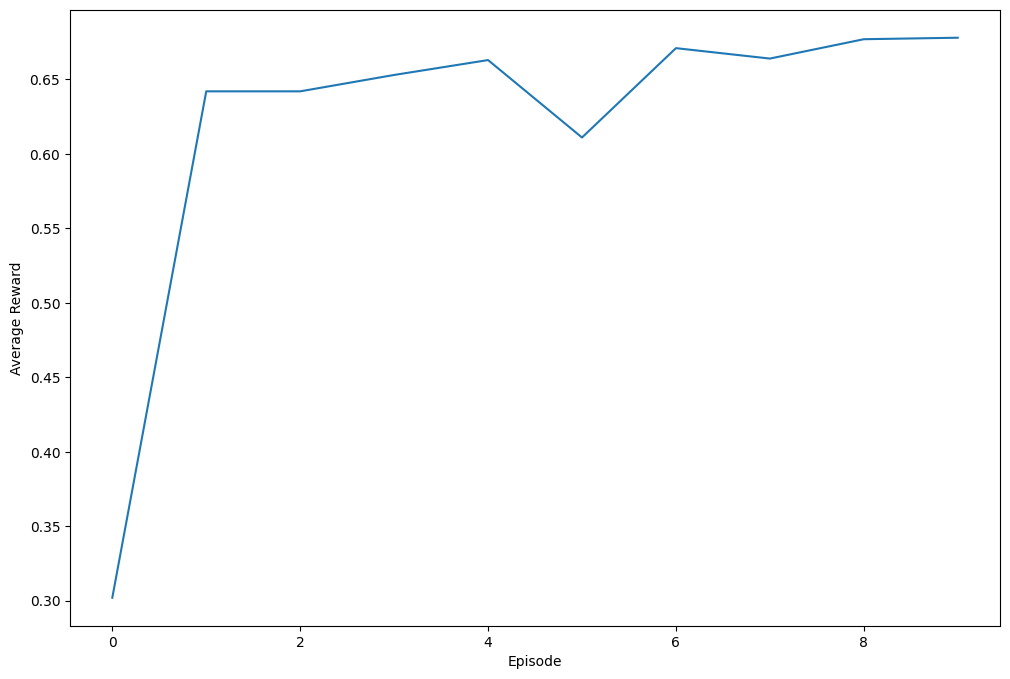

In [10]:
# Plot the average of rewards per thousand episodes
import matplotlib.pyplot as plt
def plot_rewards(avg_rewards_per_thousand_episodes):
    plt.figure(figsize=(12, 8))
    plt.plot(avg_rewards_per_thousand_episodes)
    
    plt.xlabel("Episode")
    plt.ylabel("Average Reward")
    plt.show()

plot_rewards(avg_rewards_per_thousand_episodes)

### Interpretation

From this print, you can see that the average reward per thousand episodes did indeed progress over time. When the algorithm first started training, the first thousand episodes only averaged a reward of almost **0.18**, but by the time it got to its last thousand episodes, the reward drastically improved to almost **0.7**.

Let's take a second to understand how you can interpret these results. Your agent played **10000** episodes. At each time step within an episode, the agent received a reward of **1** if it reached the frisbee, otherwise, it received a reward of **0**. If the agent did indeed reach the frisbee, then the episode finished at that time-step.

Hence, that means for each episode, the total reward received by the agent for the entire episode is either **1** or **0**. So, for the first thousand episodes, you can interpret this score as meaning that **18%** of the time the agent received a reward of **1** and won the episode. And by the last thousand episodes from a total of **10000**, the agent was winning almost **70%** of the time.

By analyzing the grid of the game, you can see it is a lot more likely that the agent would fall in a hole or perhaps reach the max time steps than it is to reach the frisbee, so reaching the frisbee **70%** of the time is not too bad, especially since the agent had no explicit instructions to reach the frisbee. It learned that this is the correct thing to do.

* SFFF
* FHFH
* FFFH
* HFFG

At last, print out your updated Q-table to see how that has transitioned from its initial state of all zeros.

## Visualize parameters

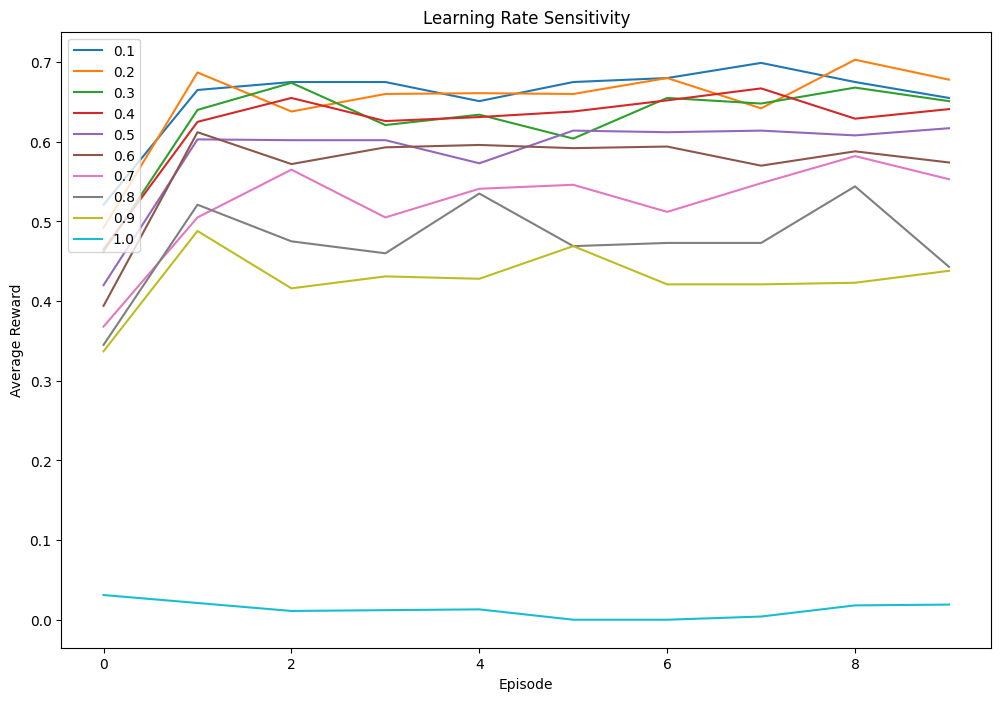

In [11]:
learning_rates = np.linspace(0.1, 1, 10)

plt.figure(figsize=(12, 8))
for learning_rate in learning_rates:
    # floor learning rate to 1 decimal place
    learning_rate = round(learning_rate, 1)
    rewards= train(learning_rate=learning_rate)
    avg_rewards_per_thousand_episodes = calc_average_reward_per_thousand_episodes(rewards, num_episodes)
    plt.plot(avg_rewards_per_thousand_episodes, label=learning_rate)

plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend(loc="upper left")
plt.title("Learning Rate Sensitivity")
plt.show()

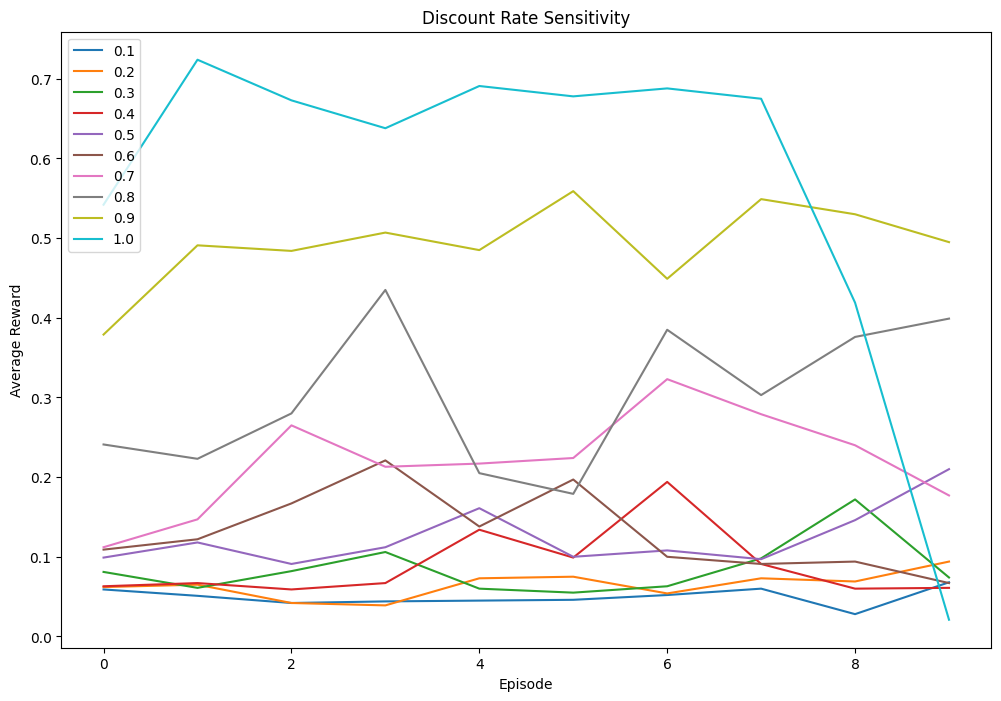

In [12]:
discount_rates = np.linspace(0.1, 1, 10)

plt.figure(figsize=(12, 8))
for discount_rate in discount_rates:
    # floor rate to 1 decimal place
    discount_rate = round(discount_rate, 1)
    rewards= train(discount_rate=discount_rate)
    avg_rewards_per_thousand_episodes = calc_average_reward_per_thousand_episodes(rewards, num_episodes)
    plt.plot(avg_rewards_per_thousand_episodes, label=discount_rate)

plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend(loc="upper left")
plt.title("Discount Rate Sensitivity")
plt.show()

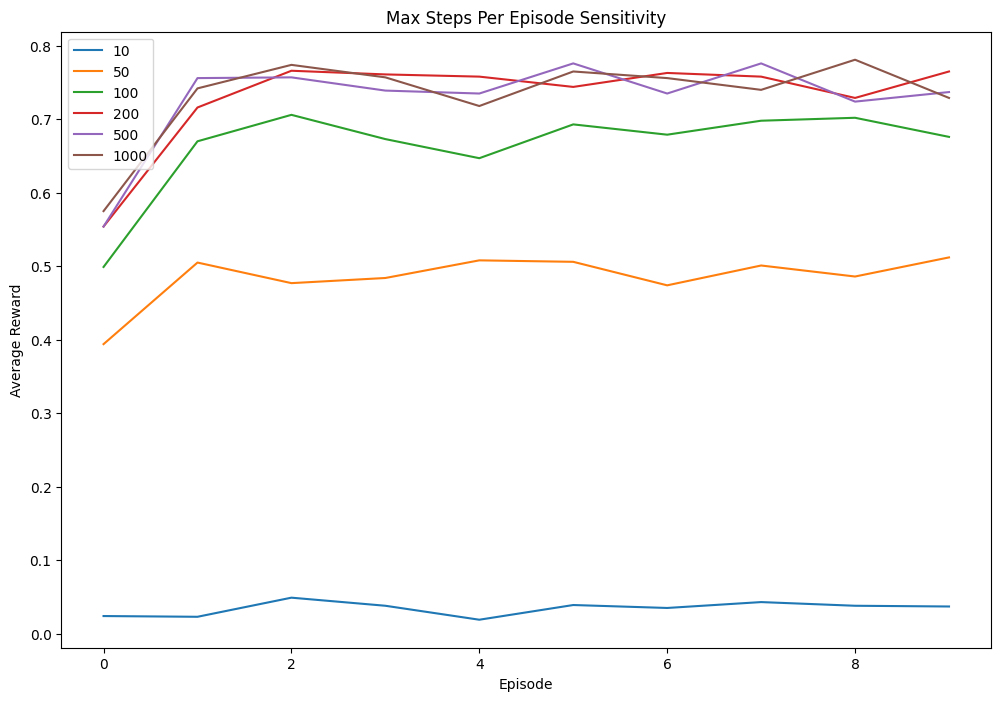

In [13]:
max_steps_per_episode_list= [10, 50, 100, 200, 500, 1000]

plt.figure(figsize=(12, 8))
for max_steps_per_episode in max_steps_per_episode_list:
    rewards= train(max_steps_per_episode=max_steps_per_episode)
    avg_rewards_per_thousand_episodes = calc_average_reward_per_thousand_episodes(rewards, num_episodes)
    plt.plot(avg_rewards_per_thousand_episodes, label=max_steps_per_episode)

plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend(loc="upper left")
plt.title("Max Steps Per Episode Sensitivity")
plt.show()

### Findings
* **Learning Rate** : The lower we select the learning rate the better the rewards across the episodes. This is because the agent is learning slowly and is able to explore more. However, if we select a very low learning rate, the agent will take a long time to learn and the rewards will be low. If we select a very high learning rate, the agent will learn fast but the rewards will be low. So, we need to find a balance between learning rate and rewards. In this case, we selected a learning rate of 0.1 and the rewards were good.
* **Discount Rate** : The higher the discount rate is to 1.0 the better the rewards across episodes. This means it seems to be better to not discount future rewards but value them the same as immediate rewards. However, if we select a very high discount rate, the agent will take a long time to learn and the rewards will be low. If we select a very low discount rate, the agent will learn fast but the rewards will be low. So, we need to find a balance between discount rate and rewards. In this case, we selected a discount rate of 0.99 and the rewards were good.
* **Max Steps per episode** : The average reward per episode seems to converge at ~200 steps per episode. This means that the agent is able to learn the optimal path to the goal within 200 steps. If we select a very low max steps per episode, the agent will not be able to learn the optimal path. If we select a very high max steps per episode, the agent will take a long time to learn the optimal path. So, we need to find a balance between max steps per episode and rewards. In this case, we selected a max steps per episode of 200 and the rewards were good.


# Optimal hyperparameters
* **Learning Rate** : 0.1
* **Discount Rate** : 0.99
* **Max Steps per episode** : 200

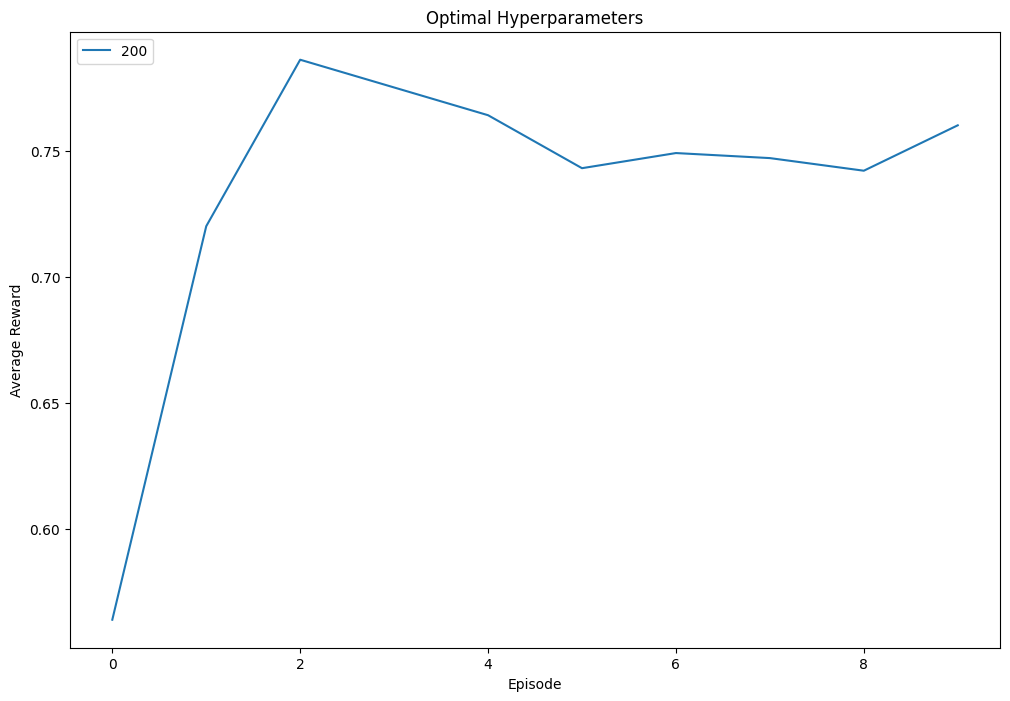

In [18]:
max_steps_per_episode=200
learning_rate=0.1
discount_rate=0.99

plt.figure(figsize=(12, 8))
rewards= train(max_steps_per_episode=max_steps_per_episode, learning_rate=learning_rate, discount_rate=discount_rate)
avg_rewards_per_thousand_episodes = calc_average_reward_per_thousand_episodes(rewards, num_episodes)
plt.plot(avg_rewards_per_thousand_episodes, label=max_steps_per_episode)

plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend(loc="upper left")
plt.title("Optimal Hyperparameters")
plt.show()

In [15]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[0.50306607 0.46374759 0.46249793 0.46195808]
 [0.30606957 0.39957731 0.32289068 0.44918097]
 [0.3967714  0.41258963 0.38298119 0.42238607]
 [0.31788663 0.23602327 0.32855268 0.41200547]
 [0.53055838 0.4372342  0.29518865 0.28099524]
 [0.         0.         0.         0.        ]
 [0.39638785 0.05400372 0.1736087  0.10865762]
 [0.         0.         0.         0.        ]
 [0.34185289 0.44343411 0.42366256 0.56067294]
 [0.30945886 0.6367464  0.39056112 0.38715197]
 [0.66732874 0.40590364 0.30688273 0.35007871]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.33436432 0.57469214 0.7699514  0.42062989]
 [0.73669012 0.93232722 0.7434061  0.7229423 ]
 [0.         0.         0.         0.        ]]
